In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
import seaborn as sns

2024-05-11 17:47:49.926995: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-11 17:47:49.927117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-11 17:47:50.122567: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/playground-series-s4e3/sample_submission.csv
/kaggle/input/playground-series-s4e3/train.csv
/kaggle/input/playground-series-s4e3/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/playground-series-s4e3/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s4e3/test.csv")
id_data = pd.read_csv("/kaggle/input/playground-series-s4e3/test.csv")

In [3]:
train_data = train_data.drop(['id'], axis=1)
test_data = test_data.drop(['id'], axis=1)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              19219 non-null  int64  
 1   X_Maximum              19219 non-null  int64  
 2   Y_Minimum              19219 non-null  int64  
 3   Y_Maximum              19219 non-null  int64  
 4   Pixels_Areas           19219 non-null  int64  
 5   X_Perimeter            19219 non-null  int64  
 6   Y_Perimeter            19219 non-null  int64  
 7   Sum_of_Luminosity      19219 non-null  int64  
 8   Minimum_of_Luminosity  19219 non-null  int64  
 9   Maximum_of_Luminosity  19219 non-null  int64  
 10  Length_of_Conveyer     19219 non-null  int64  
 11  TypeOfSteel_A300       19219 non-null  int64  
 12  TypeOfSteel_A400       19219 non-null  int64  
 13  Steel_Plate_Thickness  19219 non-null  int64  
 14  Edges_Index            19219 non-null  float64
 15  Em

In [5]:
train_data.isna().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [6]:
features_cols= test_data.columns
len(features_cols)

27

In [7]:
targets = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']

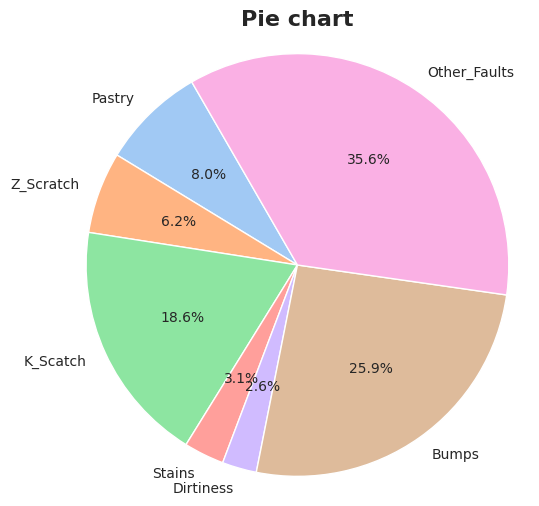

In [8]:
col_sum = train_data[targets].sum()

sns.set_style('whitegrid')
colors = sns.color_palette('pastel')

plt.figure(figsize=(6, 6))
plt.pie(col_sum, labels=col_sum.index, colors=colors, autopct='%1.1f%%', startangle=120)
plt.title('Pie chart', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

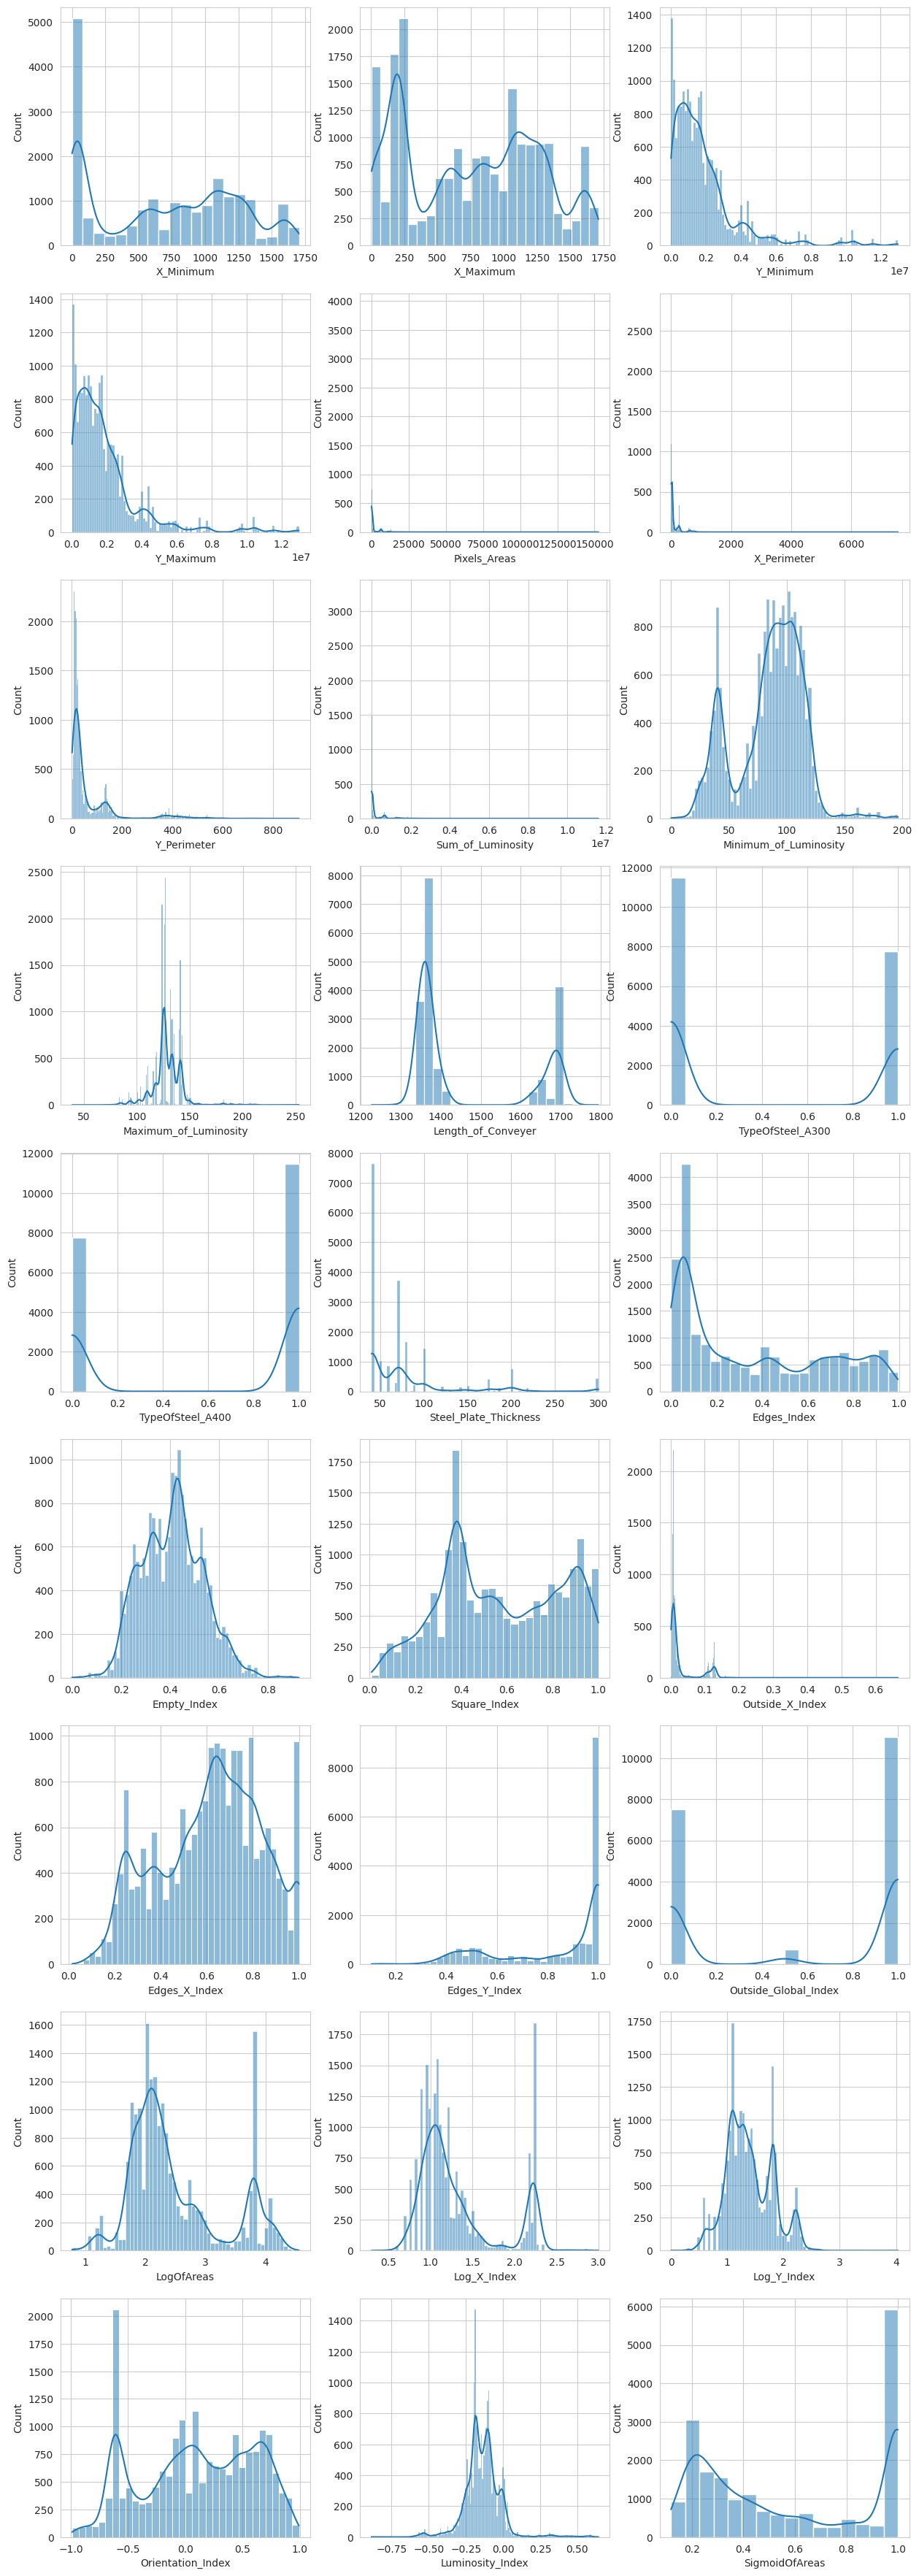

In [9]:
plt.figure(figsize=(15,45))
for i in range(27):
    plt.subplot(9,3,i+1)
    sns.histplot(data= train_data, x=features_cols[i], kde=True )
#     plt.title(features_cols[i])
plt.show()

In [10]:
def scale(X):
    from sklearn import preprocessing
    scaled=preprocessing.StandardScaler()
    scaler=scaled.fit(X)
    X=scaler.transform(X)
    return X

In [11]:
X=train_data.drop(columns=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'])
y=train_data[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults' ]]

In [12]:
X.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,584,590,909972,909977,16,8,5,2274,113,140,...,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998


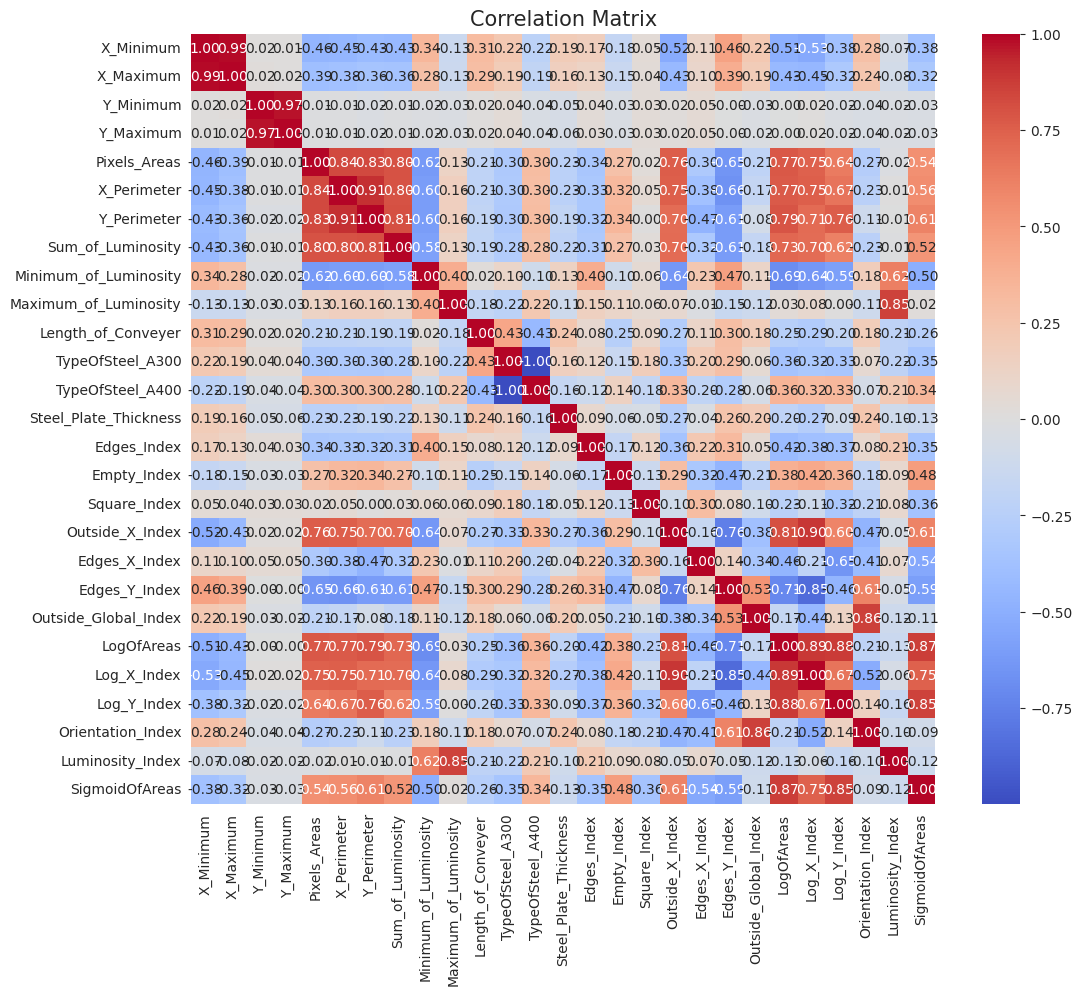

In [13]:
def correlation_matrix(df):
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

correlation_matrix(X)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(scale(X),y,train_size=0.75, random_state=42)
X.keys()
test_data=scale(test_data)

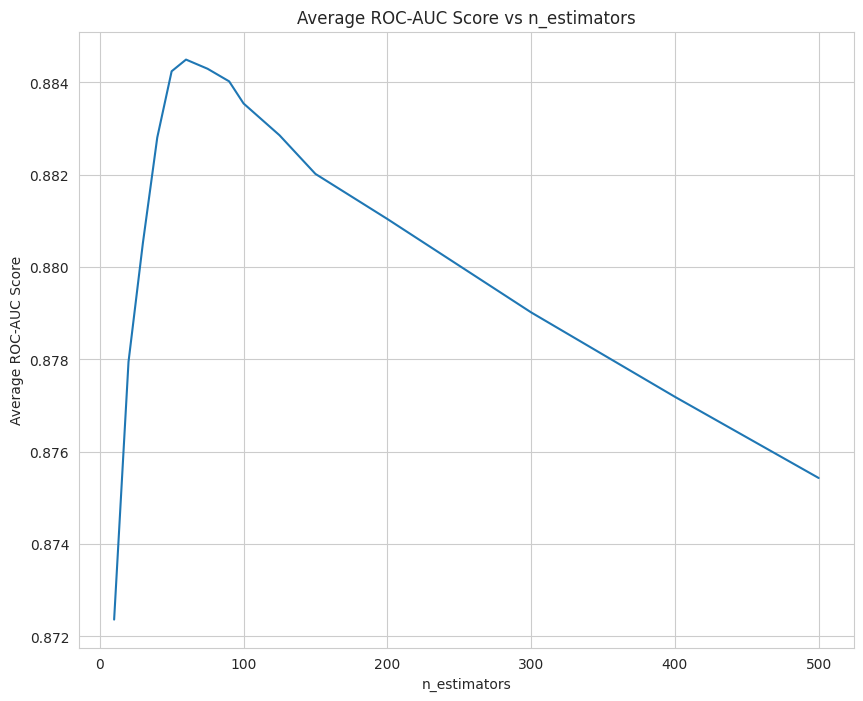

In [15]:
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize list to store average ROC-AUC scores
n_estimators = [10, 20, 30, 40, 50, 60, 75, 90, 100, 125, 150, 200, 300, 400, 500]
roc_auc_avg = []

# Calculate average ROC-AUC score across all classes for each value of n_estimators
for i in n_estimators:
    model = XGBClassifier(n_estimators=i, learning_rate=0.1, random_state=42, min_child_weight=1, gamma=0, nthread=4, subsample=0.9, colsample_bytree=0.8)
    model.fit(X_train, y_train)
    y_test_pred = model.predict_proba(X_test)

    # Calculate average ROC-AUC score across all classes
    roc_auc = roc_auc_score(y_test, y_test_pred, average='macro')
    roc_auc_avg.append(roc_auc)

# Plot average ROC-AUC score against different values of n_estimators
plt.figure(figsize=(10, 8))
plt.plot(n_estimators, roc_auc_avg)
plt.ylabel('Average ROC-AUC Score')
plt.xlabel('n_estimators')
plt.title('Average ROC-AUC Score vs n_estimators')
plt.show()

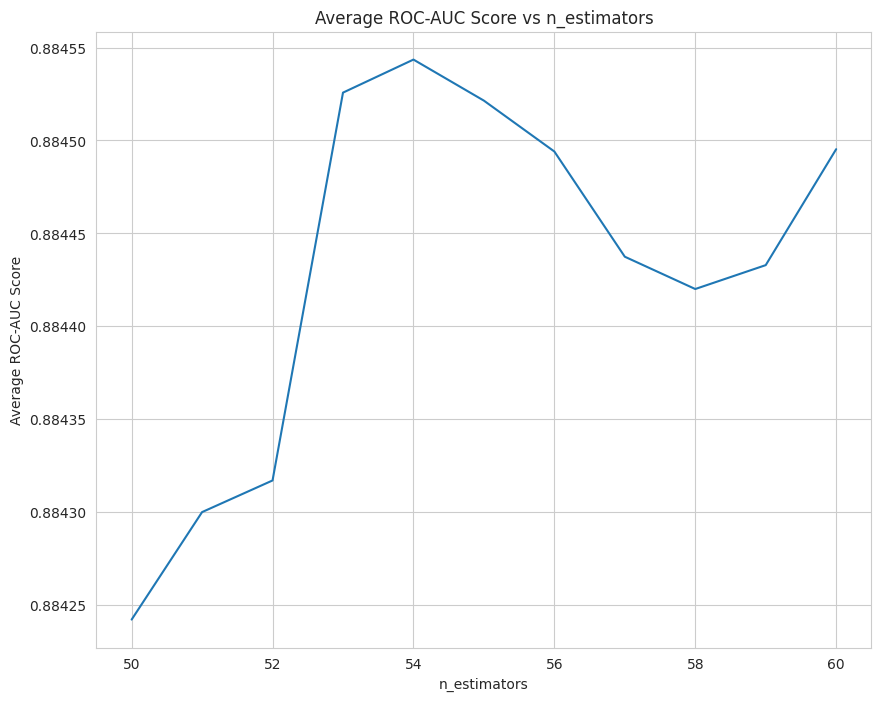

In [16]:
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize list to store average ROC-AUC scores
n_estimators = [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
roc_auc_avg1 = []

# Calculate average ROC-AUC score across all classes for each value of n_estimators
for i in n_estimators:
    model = XGBClassifier(n_estimators=i, learning_rate=0.1, random_state=42, min_child_weight=1, gamma=0, nthread=4, subsample=0.9, colsample_bytree=0.8)
    model.fit(X_train, y_train)
    y_test_pred = model.predict_proba(X_test)

    # Calculate average ROC-AUC score across all classes
    roc_auc = roc_auc_score(y_test, y_test_pred, average='macro')
    roc_auc_avg1.append(roc_auc)

# Plot average ROC-AUC score against different values of n_estimators
plt.figure(figsize=(10, 8))
plt.plot(n_estimators, roc_auc_avg1)
plt.ylabel('Average ROC-AUC Score')
plt.xlabel('n_estimators')
plt.title('Average ROC-AUC Score vs n_estimators')
plt.show()

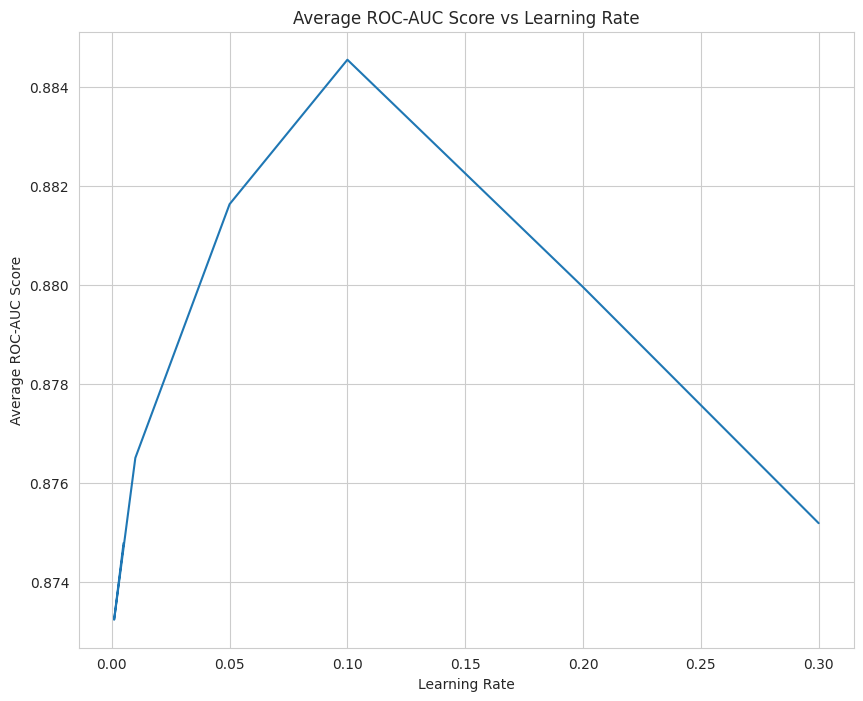

In [17]:
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Initialize list to store average ROC-AUC scores
learning_rates = [0.005, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
roc_auc_avg = []

# Calculate average ROC-AUC score across all classes for each value of learning_rate
for lr in learning_rates:
    model = XGBClassifier(n_estimators=54, learning_rate=lr, random_state=42, min_child_weight=1, gamma=0, nthread=4, subsample=0.9, colsample_bytree=0.8)
    model.fit(X_train, y_train)
    y_test_pred = model.predict_proba(X_test)

    # Calculate average ROC-AUC score across all classes
    roc_auc = roc_auc_score(y_test, y_test_pred, average='macro')
    roc_auc_avg.append(roc_auc)

# Plot average ROC-AUC score against different values of learning_rate
plt.figure(figsize=(10, 8))
plt.plot(learning_rates, roc_auc_avg)
plt.ylabel('Average ROC-AUC Score')
plt.xlabel('Learning Rate')
plt.title('Average ROC-AUC Score vs Learning Rate')
plt.show()

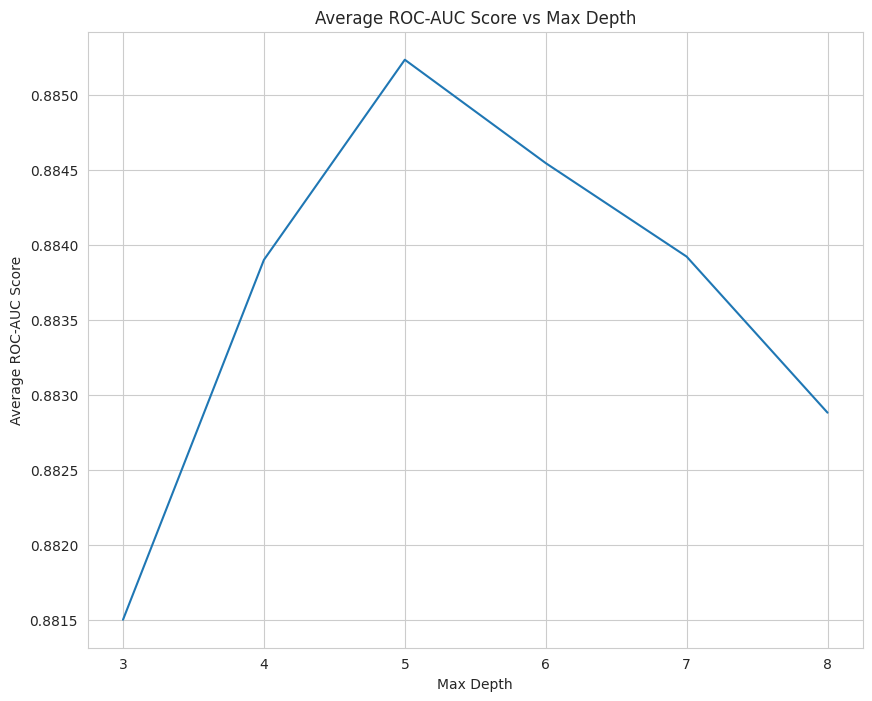

In [18]:
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Initialize list to store average ROC-AUC scores
max_depths = [3, 4, 5, 6, 7, 8]
roc_auc_avg = []

# Calculate average ROC-AUC score across all classes for each value of max_depth
for depth in max_depths:
    model = XGBClassifier(n_estimators=54, learning_rate=0.1, max_depth=depth, random_state=42, min_child_weight=1, gamma=0, nthread=4, subsample=0.9, colsample_bytree=0.8)
    model.fit(X_train, y_train)
    y_test_pred = model.predict_proba(X_test)

    # Calculate average ROC-AUC score across all classes
    roc_auc = roc_auc_score(y_test, y_test_pred, average='macro')
    roc_auc_avg.append(roc_auc)

# Plot average ROC-AUC score against different values of max_depth
plt.figure(figsize=(10, 8))
plt.plot(max_depths, roc_auc_avg)
plt.ylabel('Average ROC-AUC Score')
plt.xlabel('Max Depth')
plt.title('Average ROC-AUC Score vs Max Depth')
plt.show()

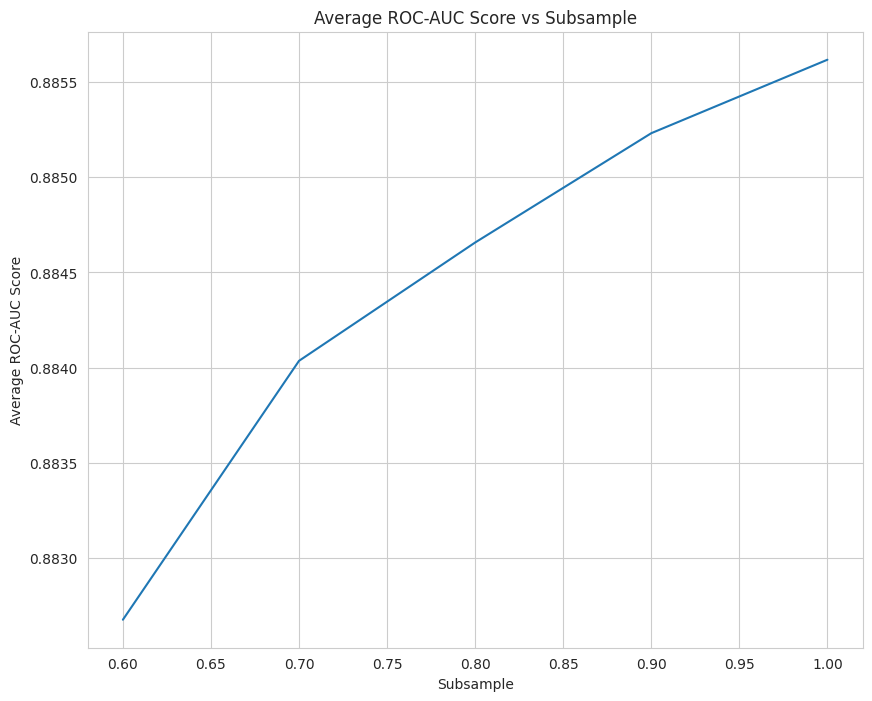

In [19]:
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Initialize list to store average ROC-AUC scores
subsamples = [0.6, 0.7, 0.8, 0.9, 1.0]
roc_auc_avg = []

# Calculate average ROC-AUC score across all classes for each value of subsample
for subsample_value in subsamples:
    model = XGBClassifier(n_estimators=54, learning_rate=0.1, max_depth=5, random_state=42, min_child_weight=1, gamma=0, nthread=4, subsample=subsample_value, colsample_bytree=0.8)
    model.fit(X_train, y_train)
    y_test_pred = model.predict_proba(X_test)

    # Calculate average ROC-AUC score across all classes
    roc_auc = roc_auc_score(y_test, y_test_pred, average='macro')
    roc_auc_avg.append(roc_auc)

# Plot average ROC-AUC score against different values of subsample
plt.figure(figsize=(10, 8))
plt.plot(subsamples, roc_auc_avg)
plt.ylabel('Average ROC-AUC Score')
plt.xlabel('Subsample')
plt.title('Average ROC-AUC Score vs Subsample')
plt.show()

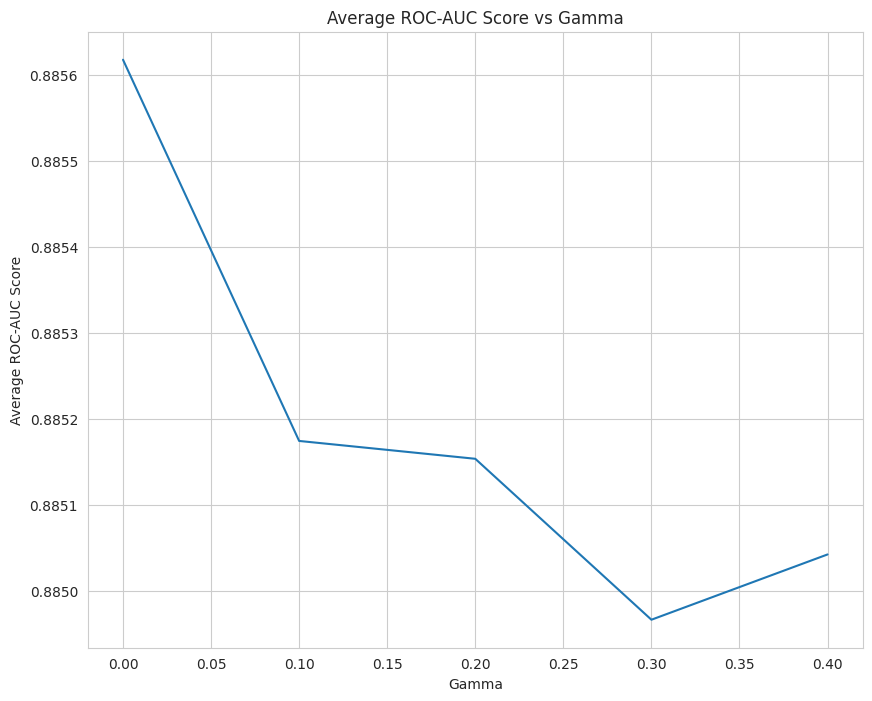

In [20]:
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Initialize list to store average ROC-AUC scores
gammas = [0, 0.1, 0.2, 0.3, 0.4]
roc_auc_avg = []

# Calculate average ROC-AUC score across all classes for each value of gamma
for gamma_value in gammas:
    model = XGBClassifier(n_estimators=54, learning_rate=0.1, max_depth=5, random_state=42, min_child_weight=1, gamma=gamma_value, nthread=4, subsample=1.0, colsample_bytree=0.8)
    model.fit(X_train, y_train)
    y_test_pred = model.predict_proba(X_test)

    # Calculate average ROC-AUC score across all classes
    roc_auc = roc_auc_score(y_test, y_test_pred, average='macro')
    roc_auc_avg.append(roc_auc)

# Plot average ROC-AUC score against different values of gamma
plt.figure(figsize=(10, 8))
plt.plot(gammas, roc_auc_avg)
plt.ylabel('Average ROC-AUC Score')
plt.xlabel('Gamma')
plt.title('Average ROC-AUC Score vs Gamma')
plt.show()

In [21]:
model = XGBClassifier(n_estimators=54,learning_rate=0.1, max_depth=5, random_state=42,min_child_weight=1,gamma=0,nthread=4,subsample=1.0,colsample_bytree=0.8,)
model.fit(X_train, y_train,eval_set=[(X_test, y_test)],verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=54, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

<Figure size 1000x800 with 0 Axes>

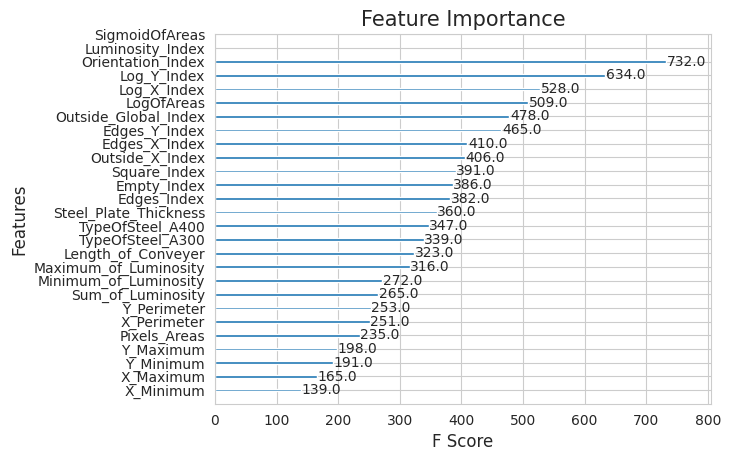

In [22]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=25)  # Adjust max_num_features
plt.title('Feature Importance', fontsize=15)
plt.xlabel('F Score', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Set custom tick labels for features
feature_names = X.columns
plt.yticks(range(len(feature_names)), feature_names)

plt.show()

In [23]:
predictions = model.predict_proba(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.14191971265906306


In [24]:
binary_predictions = (predictions > 0.5).astype(int)

# Assuming 'predictions' is a DataFrame containing predicted probabilities for each class
# You can convert it to a DataFrame if it's not already in that format
predictions_df = pd.DataFrame(binary_predictions, columns=y_test.columns)

# Add the 'id' column from the test data to the predictions DataFrame
predictions_df.insert(0, 'id', id_data['id'])

# Display the first few rows of the predictions DataFrame
print(predictions_df.head(20))


       id  Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults
0   19219       0          0         0       0          0      0             1
1   19220       0          0         1       0          0      0             0
2   19221       0          0         0       0          0      0             1
3   19222       0          0         0       0          0      0             0
4   19223       0          0         0       0          0      0             0
5   19224       0          0         0       0          0      0             0
6   19225       0          0         0       0          0      0             0
7   19226       0          1         0       0          0      0             0
8   19227       0          0         0       0          0      1             0
9   19228       0          0         0       0          0      0             0
10  19229       0          0         1       0          0      0             0
11  19230       0          0         0       0      

In [25]:
# If you want to print predictions along with the corresponding true labels
for i in range(20):  # Print predictions for the first 5 rows
    print("True Labels:", y_test.iloc[i].values)
    print("Predicted Probabilities:", binary_predictions[i])
    print()

True Labels: [0 0 0 0 0 0 1]
Predicted Probabilities: [0 0 0 0 0 0 1]

True Labels: [0 0 1 0 0 0 0]
Predicted Probabilities: [0 0 1 0 0 0 0]

True Labels: [0 0 0 0 0 0 1]
Predicted Probabilities: [0 0 0 0 0 0 1]

True Labels: [0 0 0 0 0 0 1]
Predicted Probabilities: [0 0 0 0 0 0 0]

True Labels: [0 0 0 0 0 0 1]
Predicted Probabilities: [0 0 0 0 0 0 0]

True Labels: [0 0 0 0 0 0 1]
Predicted Probabilities: [0 0 0 0 0 0 0]

True Labels: [0 0 0 0 0 1 0]
Predicted Probabilities: [0 0 0 0 0 0 0]

True Labels: [0 1 0 0 0 0 0]
Predicted Probabilities: [0 1 0 0 0 0 0]

True Labels: [0 0 0 0 0 1 0]
Predicted Probabilities: [0 0 0 0 0 1 0]

True Labels: [0 0 0 0 0 0 0]
Predicted Probabilities: [0 0 0 0 0 0 0]

True Labels: [0 0 1 0 0 0 0]
Predicted Probabilities: [0 0 1 0 0 0 0]

True Labels: [0 0 0 0 0 0 1]
Predicted Probabilities: [0 0 0 0 0 0 0]

True Labels: [0 0 0 0 1 0 0]
Predicted Probabilities: [0 0 0 0 0 0 0]

True Labels: [0 0 1 0 0 0 0]
Predicted Probabilities: [0 0 1 0 0 0 0]

True L

ROC-AUC Score for Class Pastry: 0.8683
ROC-AUC Score for Class Z_Scratch: 0.9573
ROC-AUC Score for Class K_Scatch: 0.9865
ROC-AUC Score for Class Stains: 0.9916
ROC-AUC Score for Class Dirtiness: 0.8833
ROC-AUC Score for Class Bumps: 0.8047
ROC-AUC Score for Class Other_Faults: 0.7076


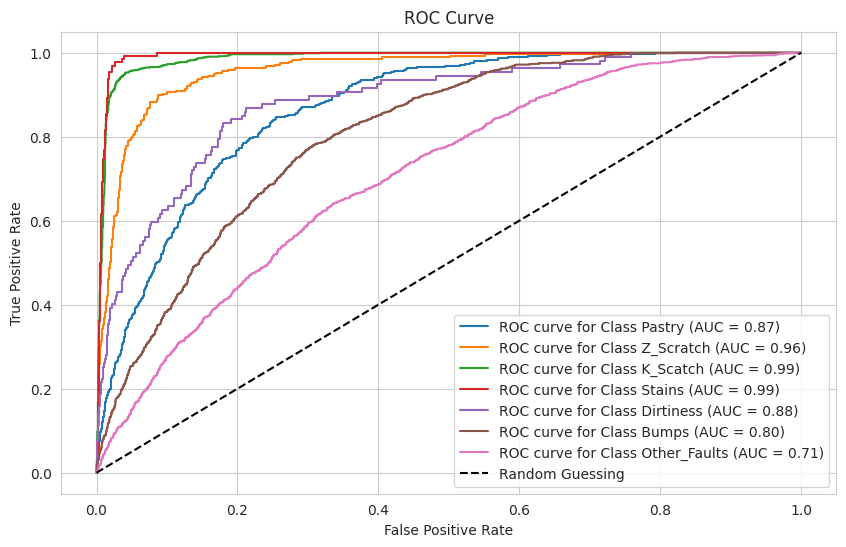

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(len(y_test.columns)):
    roc_auc = roc_auc_score(y_test.iloc[:, i], predictions[:, i])
    roc_auc_scores.append(roc_auc)
    print("ROC-AUC Score for Class {}: {:.4f}".format(y_test.columns[i], roc_auc))

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(y_test.columns)):
    fpr, tpr, _ = roc_curve(y_test.iloc[:, i], predictions[:, i])
    plt.plot(fpr, tpr, label='ROC curve for Class {} (AUC = {:.2f})'.format(y_test.columns[i], roc_auc_scores[i]))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [27]:
# Calculate average ROC-AUC score
average_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print("Average ROC-AUC Score: {:.10f}".format(average_roc_auc))

#Best Average ROC-AUC Score: 0.8856180590

Average ROC-AUC Score: 0.8856180590


In [28]:
result=np.round(model.predict_proba(test_data),6)

In [29]:
submission = pd.DataFrame( result, columns=y.keys())
submission.insert(0, 'id', id_data['id']) 
submission.to_csv('submission.csv', index=False)

In [30]:
submission.shape

(12814, 8)